# Smith Chart text() Method - Comprehensive Demo

This notebook demonstrates all features of the custom `text()` method for Smith charts, including:
- Coordinate transformation
- Styling options  
- Integration with plotting
- Practical examples

## Setup

First, let's import the required libraries and set up the environment.

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

from pysmithchart import ABSOLUTE_DOMAIN, REFLECTANCE_DOMAIN, ADMITTANCE_DOMAIN, IMPEDANCE_DOMAIN

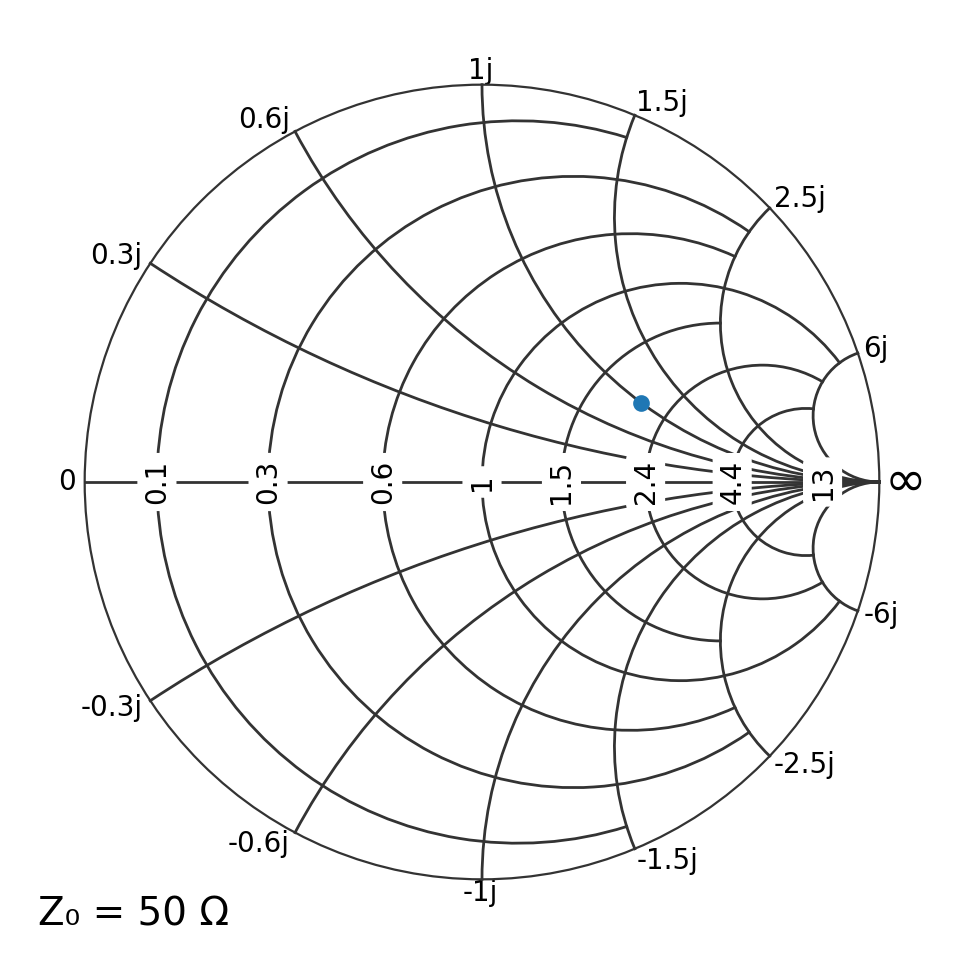

In [2]:
fig=plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="smith")
ax.plot(2+1j, domain=ABSOLUTE_DOMAIN)
plt.show()

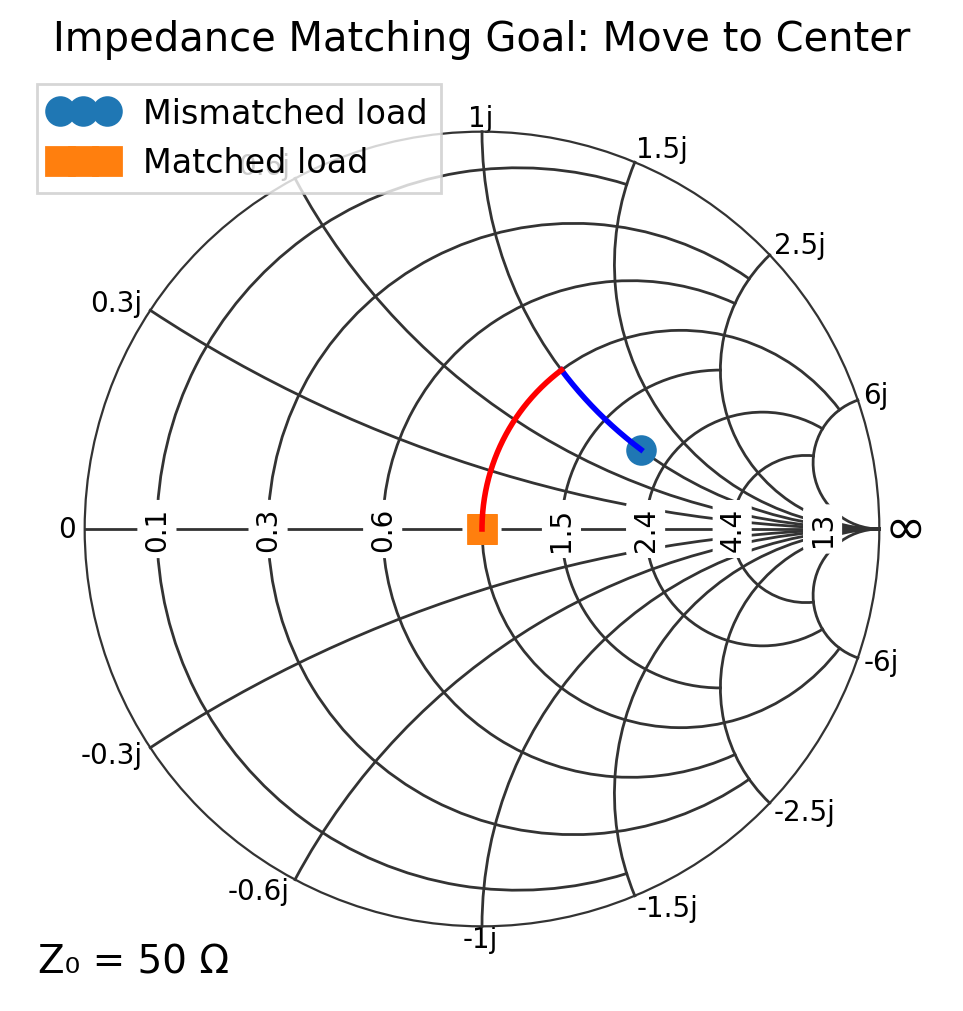

In [3]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, projection='smith', domain=ABSOLUTE_DOMAIN)
ax.plot([2+1j], 'o', ms=10, label='Mismatched load')
ax.plot([1+0j], 's', ms=10, label='Matched load')
ax.plot_constant_reactance(1, 'b', resistance_range=(2,1), domain=ABSOLUTE_DOMAIN)
ax.plot_constant_resistance(1, 'r', reactance_range=(1,0), domain=ABSOLUTE_DOMAIN)
ax.legend()
ax.set_title("Impedance Matching Goal: Move to Center")
plt.show()


## 1. Basic Text Labels

Let's start with basic text labels at various impedance points. 

Text coordinates use **impedance space** (R+jX), just like the `plot()` method!

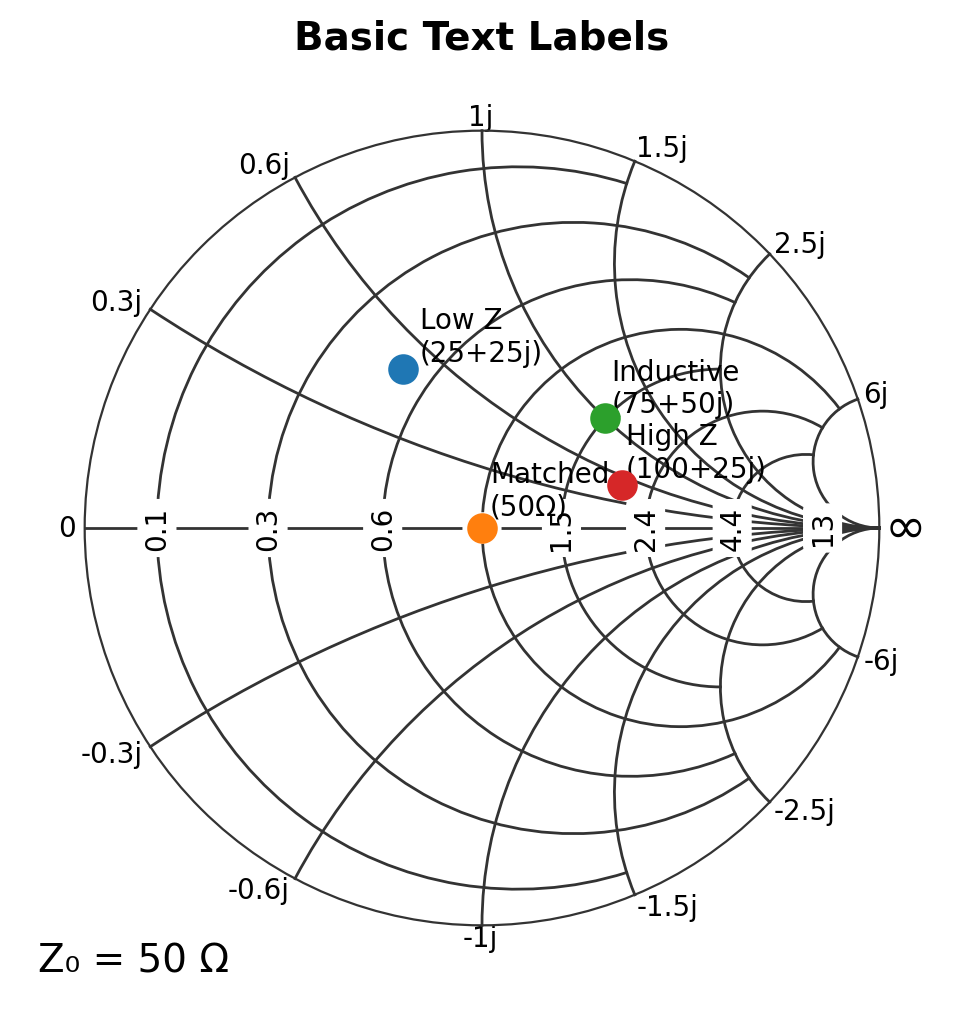

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('Basic Text Labels', fontsize=14, fontweight='bold')

# Define impedance points and labels
basic_points = [
    (25, 25, 'Low Z\n(25+25j)'),
    (50, 0, 'Matched\n(50Ω)'),
    (75, 50, 'Inductive\n(75+50j)'),
    (100, 25, 'High Z\n(100+25j)'),
]

# Plot points and add text labels
for x, y, label in basic_points:
    ax.plot(x+y*1j, 'o', markersize=10)
    ax.text(x+2, y+2, label, ha='left', va='bottom', fontsize=10, domain=IMPEDANCE_DOMAIN)

plt.show()

## 2. Styled Text

The `text()` method supports all matplotlib text styling options:
- Colors
- Font weights (normal, bold)
- Font sizes
- Font families

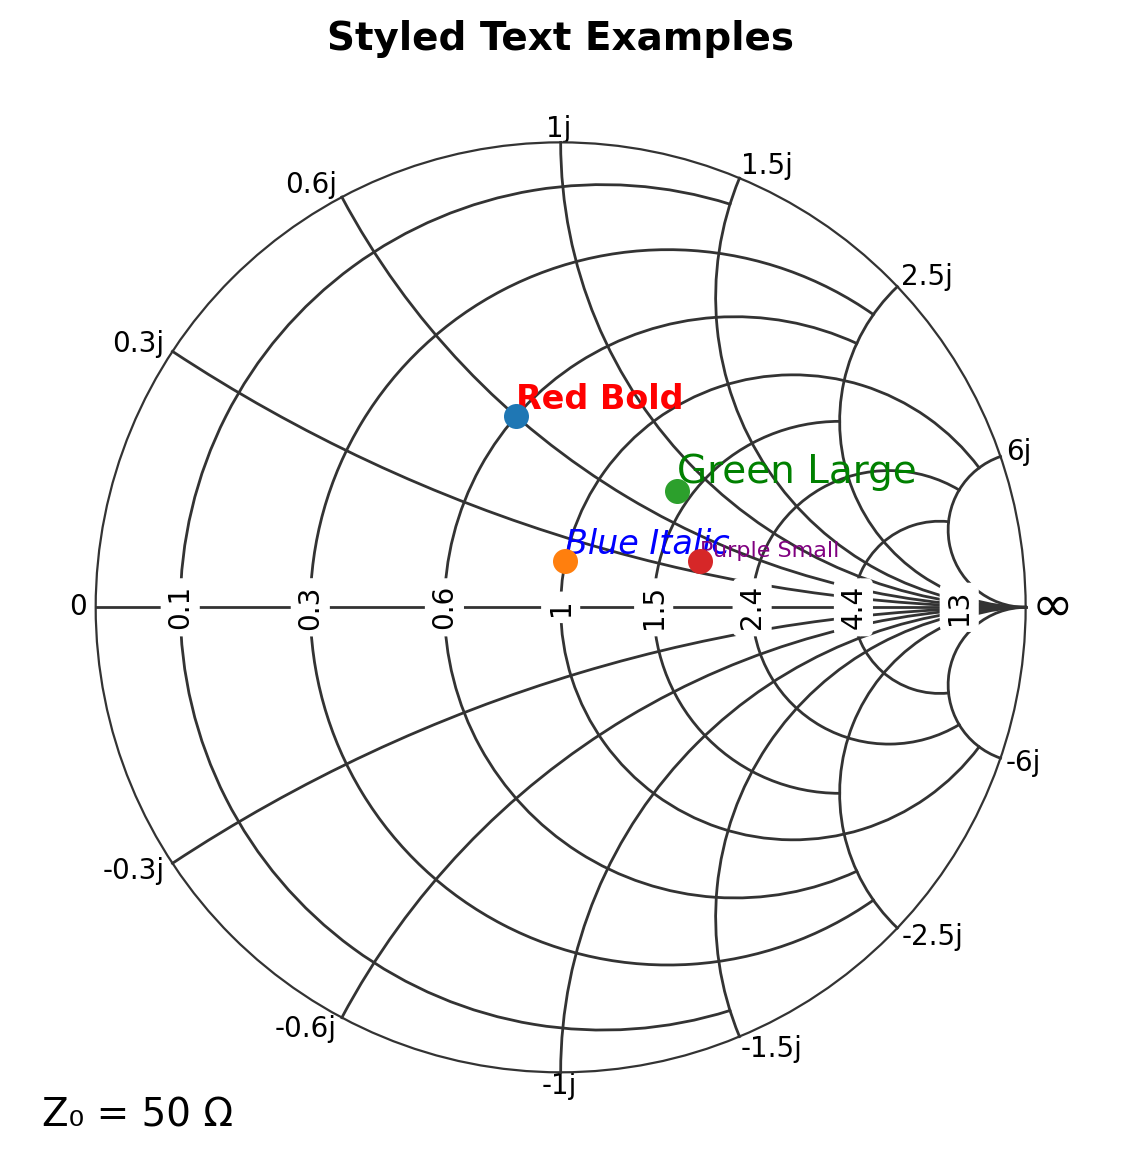

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('Styled Text Examples', fontsize=14, fontweight='bold')

# Different styling options
styled_examples = [
    (30, 30, 'Red Bold', {'color': 'red', 'fontweight': 'bold', 'fontsize': 12}),
    (50, 10, 'Blue Italic', {'color': 'blue', 'fontstyle': 'italic', 'fontsize': 12}),
    (70, 40, 'Green Large', {'color': 'green', 'fontsize': 14}),
    (90, 20, 'Purple Small', {'color': 'purple', 'fontsize': 8}),
]

for x, y, label, style in styled_examples:
    ax.plot([x+y*1j], 'o', markersize=8, domain=IMPEDANCE_DOMAIN)
    ax.text(x, y, label, ha='left', va='bottom', **style, domain=IMPEDANCE_DOMAIN)

plt.tight_layout()
plt.show()

## 3. Text Alignment

Control text positioning with horizontal and vertical alignment:
- **Horizontal**: 'left', 'center', 'right'
- **Vertical**: 'top', 'center', 'bottom'

All 9 combinations are shown below.

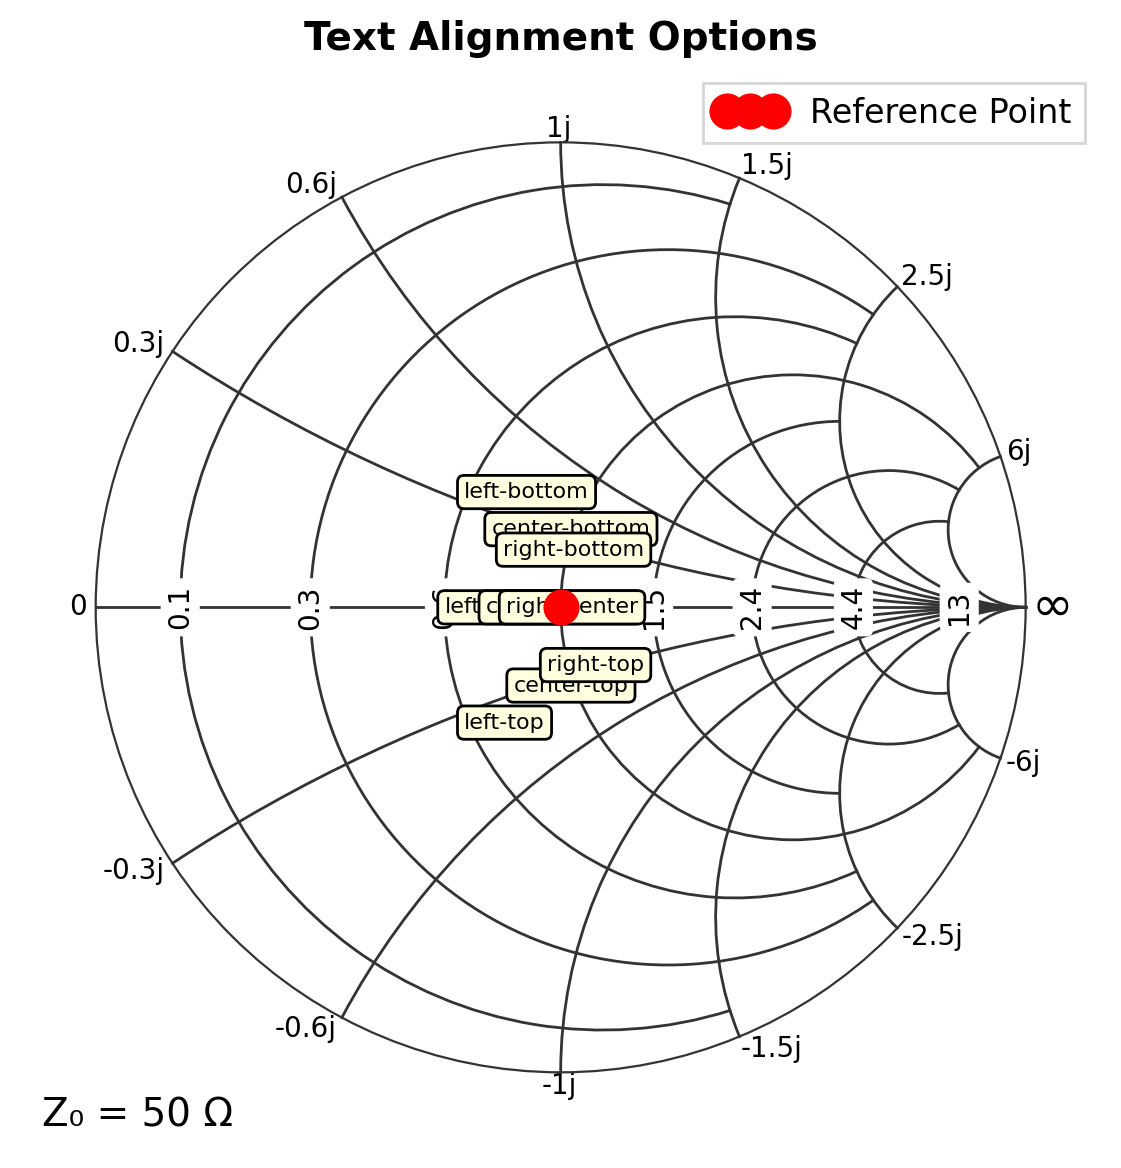

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('Text Alignment Options', fontsize=14, fontweight='bold')

# Plot center reference point
ax.plot([50+0j], 'o', markersize=12, color='red', domain=IMPEDANCE_DOMAIN, label='Reference Point')

# Different alignments around the center
align_examples = [
    (30, 15, 'left-bottom', 'left', 'bottom'),
    (50, 15, 'center-bottom', 'center', 'bottom'),
    (70, 15, 'right-bottom', 'right', 'bottom'),
    (30, 0, 'left-center', 'left', 'center'),
    (50, 0, 'center-center', 'center', 'center'),
    (70, 0, 'right-center', 'right', 'center'),
    (30, -15, 'left-top', 'left', 'top'),
    (50, -15, 'center-top', 'center', 'top'),
    (70, -15, 'right-top', 'right', 'top'),
]

for x, y, label, ha, va in align_examples:
    ax.text(x, y, label, ha=ha, va=va, fontsize=8,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=1.0), domain=IMPEDANCE_DOMAIN)

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 4. Background Boxes

Add background boxes to text labels for better visibility and aesthetics.

Available box styles:
- 'round' - Rounded corners
- 'square' - Square corners
- 'round4' - Heavily rounded
- 'roundtooth' - Speech bubble style

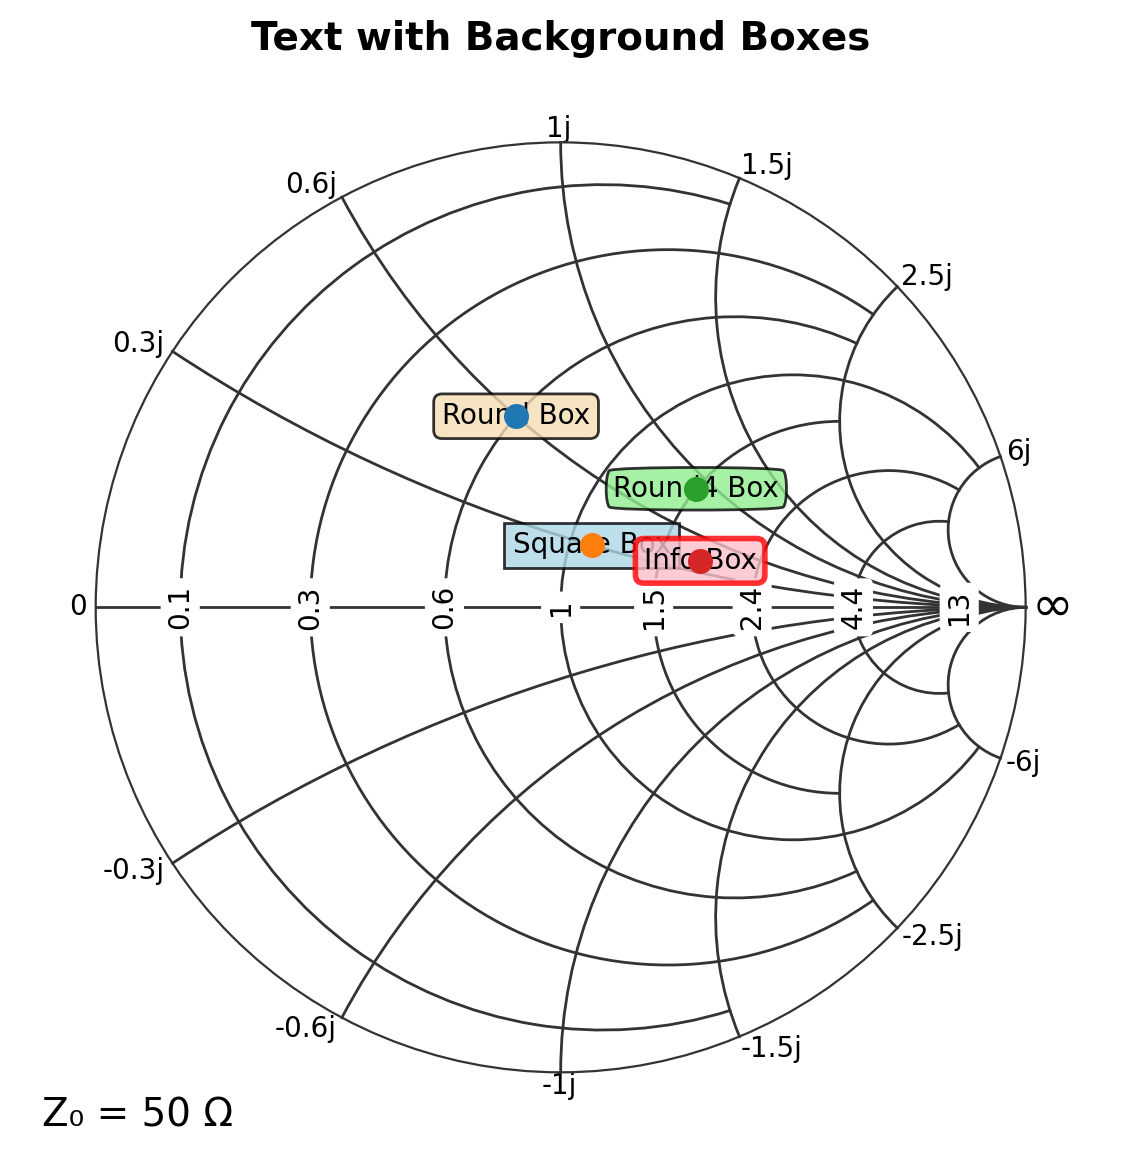

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('Text with Background Boxes', fontsize=14, fontweight='bold')

# Different box styles and colors
box_examples = [
    (30, 30, 'Round Box', dict(boxstyle='round', facecolor='wheat', alpha=0.8)),
    (55, 15, 'Square Box', dict(boxstyle='square', facecolor='lightblue', alpha=0.8)),
    (75, 45, 'Round4 Box', dict(boxstyle='round4', facecolor='lightgreen', alpha=0.8)),
    (90, 20, 'Info Box', dict(boxstyle='round', facecolor='pink', alpha=0.8, edgecolor='red', linewidth=2)),
]

for x, y, label, bbox_props in box_examples:
    ax.plot([x+y*1j], 'o', markersize=8, domain=IMPEDANCE_DOMAIN)
    ax.text(x, y, label, ha='center', va='center', fontsize=10, bbox=bbox_props, domain=IMPEDANCE_DOMAIN)

plt.tight_layout()
plt.show()

## 5. Rotated Text

Text can be rotated to any angle using the `rotation` parameter (in degrees).

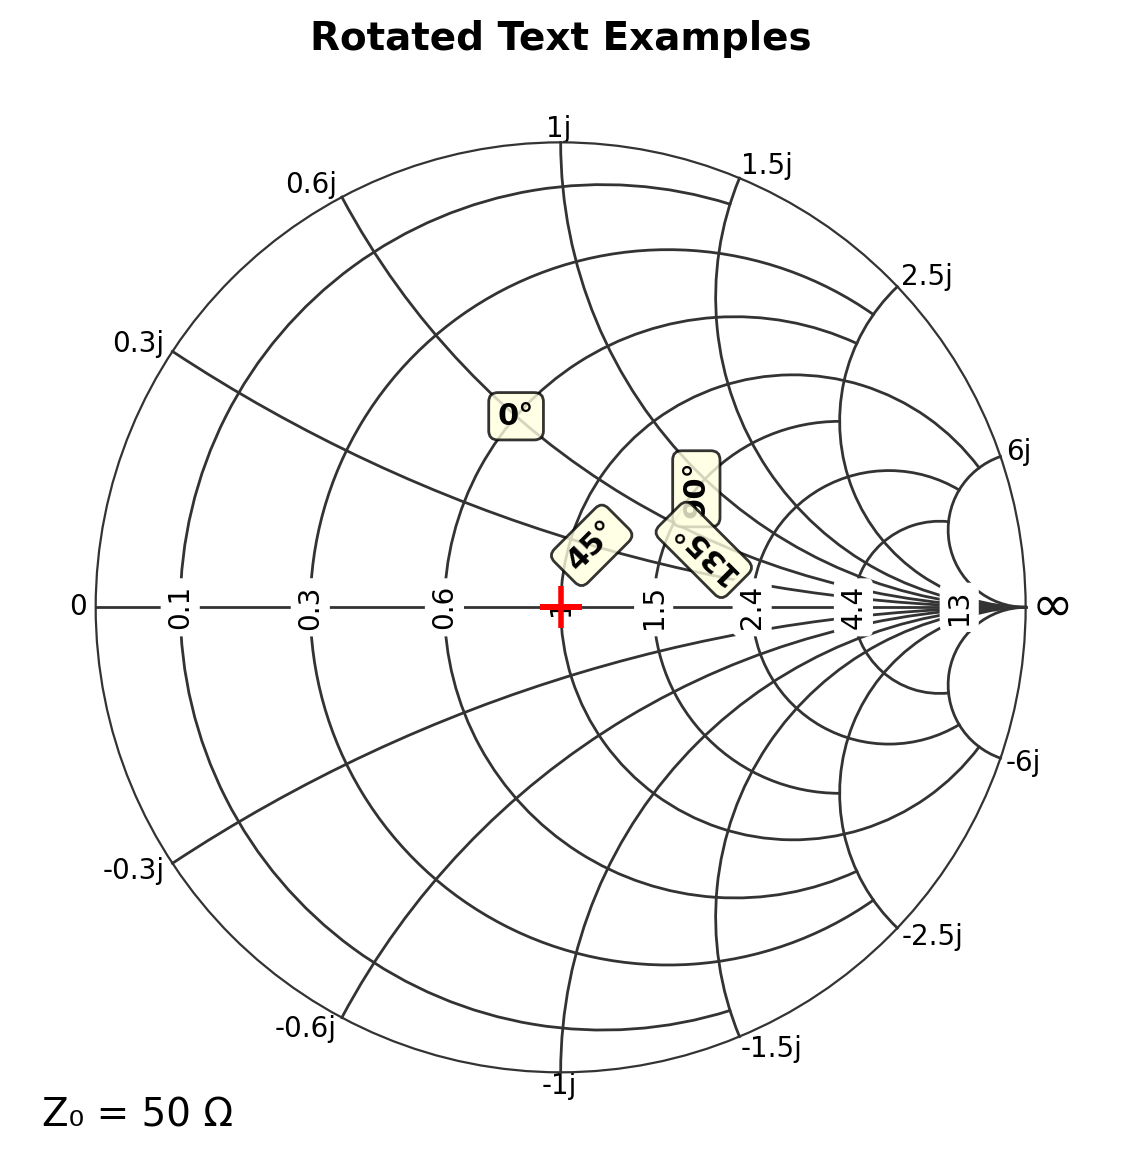

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('Rotated Text Examples', fontsize=14, fontweight='bold')

# Text at various rotation angles
rotations = [(30, 30, 0), (55, 15, 45), (75, 45, 90), (90, 25, 135)]

for x, y, rot in rotations:
    ax.text(x, y, f'{rot}°', rotation=rot,
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8), domain=IMPEDANCE_DOMAIN)

# Add center reference
ax.plot([50+0j], '+', markersize=15, color='red', markeredgewidth=2)

plt.tight_layout()
plt.show()

## 6. Practical Example: Labeled RF Circuit

This example shows how to label components in an RF circuit analysis on a Smith chart.

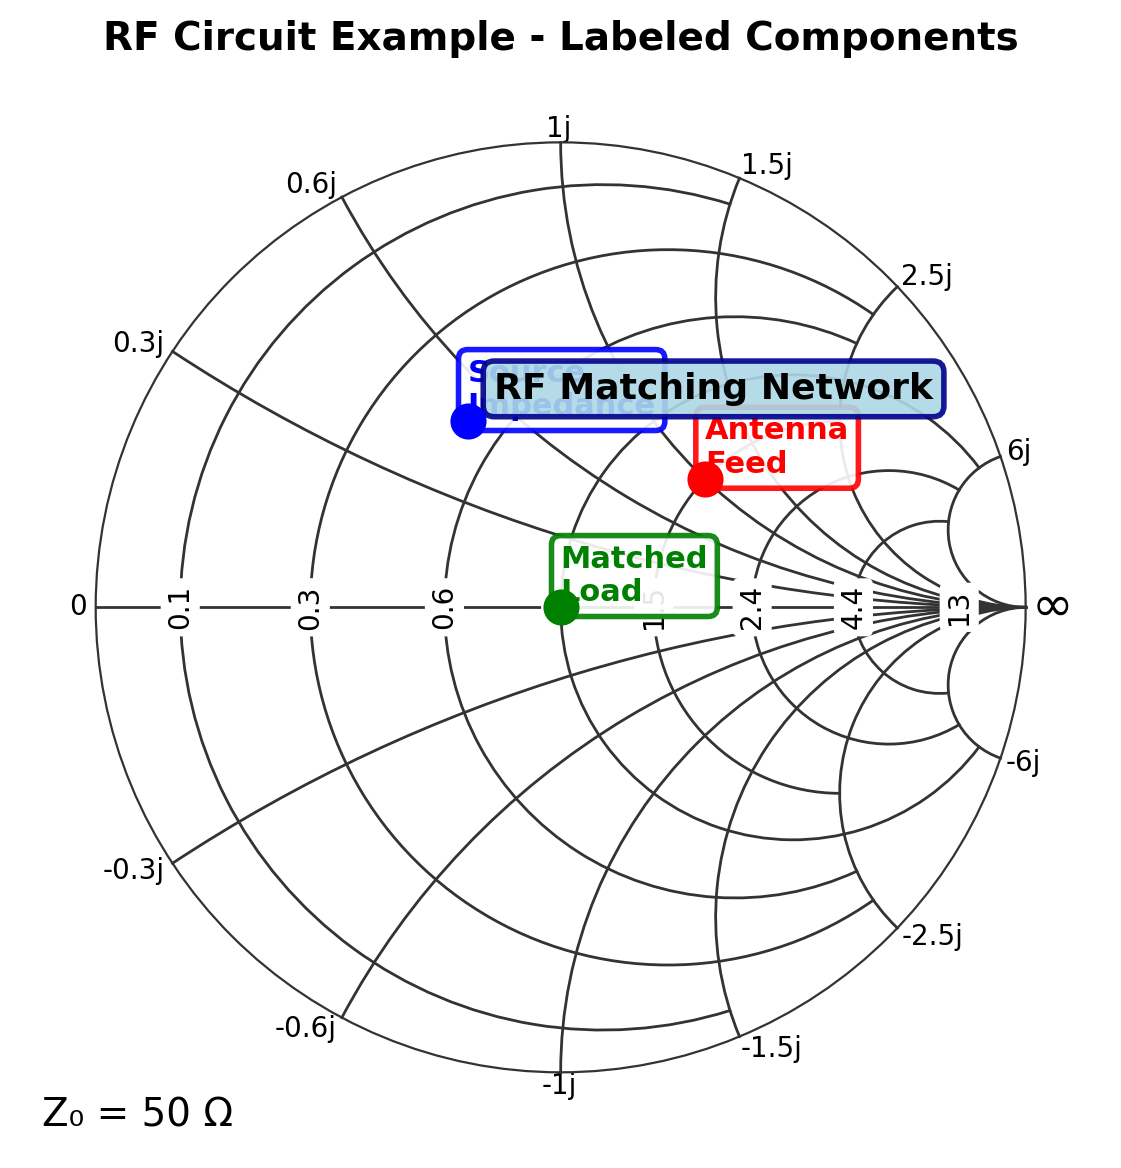

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('RF Circuit Example - Labeled Components', fontsize=14, fontweight='bold')

# Define circuit component impedances
circuit_points = [
    (25+25j, 'Source\nImpedance', 'blue'),
    (50+0j, 'Matched\nLoad', 'green'),
    (75+50j, 'Antenna\nFeed', 'red'),
]

# Plot and label each component
for z, label, color in circuit_points:
    # Plot the impedance point
    ax.plot([z], 'o', markersize=12, color=color, domain=IMPEDANCE_DOMAIN)
    
    # Add text label with background box
    ax.text(z.real, z.imag, label, 
            ha='left', va='bottom',
            fontsize=11, fontweight='bold', color=color,
            bbox=dict(boxstyle='round', facecolor='white', 
                      edgecolor=color, linewidth=2, alpha=0.9), domain=IMPEDANCE_DOMAIN)

# Add circuit title
ax.text(50, 70, 'RF Matching Network',
        ha='center', va='center',
        fontsize=13, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightblue', 
                  edgecolor='darkblue', linewidth=2, alpha=0.9), domain=IMPEDANCE_DOMAIN)

plt.tight_layout()
plt.show()

## 7. Complete Example: All Features Combined

This final example demonstrates multiple text features working together.

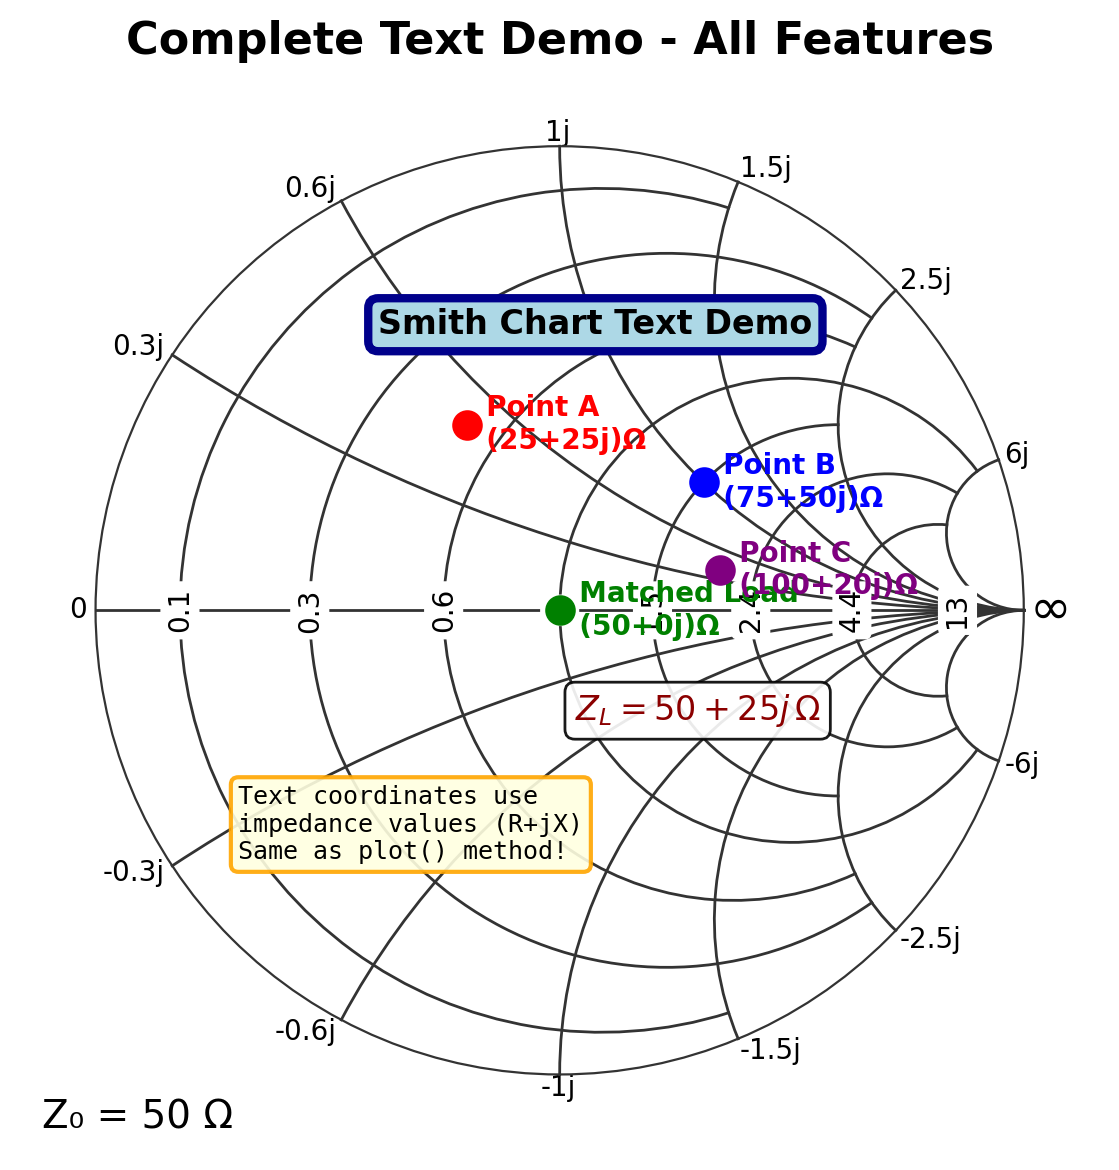

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'smith'})
ax.set_title('Complete Text Demo - All Features', fontsize=16, fontweight='bold')

# Plot and label multiple measurement points
measurements = [
    (25+25j, 'Point A', 'red'),
    (50+0j, 'Matched Load', 'green'),
    (75+50j, 'Point B', 'blue'),
    (100+20j, 'Point C', 'purple'),
]

# Plot points with labels
for z, label, color in measurements:
    ax.plot(z, 'o', markersize=10, color=color)
    ax.text(z, f'  {label}\n  {z}Ω', ha='left', va='center', fontsize=10, color=color, fontweight='bold')

# Add chart title with fancy box
ax.text(25, 50, 'Smith Chart Text Demo', ha='center', va='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='darkblue', linewidth=3, alpha=1))

# Add informational note
info_text = '''Text coordinates use
impedance values (R+jX)
Same as plot() method!'''

ax.text(5, -15, info_text,
        ha='left', va='center',
        fontsize=9, family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', 
                  edgecolor='orange', linewidth=1.5, alpha=0.9), domain=IMPEDANCE_DOMAIN)

# Add a mathematical expression
ax.text(80, -40, r'$Z_L = 50 + 25j\,\Omega$',
        ha='center', va='center',
        fontsize=12, color='darkred',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9), domain=IMPEDANCE_DOMAIN)

plt.tight_layout()
plt.show()